### Import Library

In [1]:
from lib.MLP import *
from lib.graph import draw_dot
from lib.graph import draw_mlp
import random


import time
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


### Mnist Scikit

#### Log Regression

In [ ]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)


#Ngebantu ngacak urutan data, biar gk bias ke 0 soalnya mnist ngurut
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))




In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

In [ ]:
print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Turn up tolerance for faster convergence
clf = LogisticRegression()
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

In [ ]:
import matplotlib.pyplot as plt

plt.hist(clf.coef_[0], bins=20)
plt.xlabel("Coefficient Value")
plt.ylabel("Frequency")
plt.title("Distribution of Coefficients")
plt.show()

In [ ]:
coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

#### MLP Scikit

In [ ]:
# Load MNIST dari OpenML
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
# Normalisasi (scaling agar lebih stabil)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data menjadi training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Buat model MLP
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                    alpha=0.001, max_iter=20, random_state=42)

# Training model
mlp.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = mlp.predict(X_test)


In [ ]:
# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model MLP: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
sample_idx = 2
sample_image = X_test[sample_idx].reshape(1, -1)  # Ambil satu sample
proba = mlp.predict_proba(sample_image)[0]  # Ambil probabilitas dari output
proba

In [ ]:
# Pilih satu gambar uji
sample_idx = 2
sample_image = X_test[sample_idx].reshape(1, -1)  # Ambil satu sample
proba = mlp.predict_proba(sample_image)[0]  # Ambil probabilitas dari output

# Plot Probabilitas Output
plt.bar(range(10), proba)
plt.xlabel("Digit (0-9)")
plt.ylabel("Probabilitas")
plt.title("Probabilitas Prediksi Model MLP Sklearn")
plt.show()


In [ ]:
sample_image

### Implementation Scratch

#### MNIST

In [22]:
# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [24]:
train_samples = 1000
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))
X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=500
)
encoder = OneHotEncoder(sparse_output=False)
y_train_encode = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_encode = encoder.transform(y_test.reshape(-1, 1))

input_layer = X_train.shape[1]  # 784
output_layer = 10  # MNIST punya 10 kelas (0-9)
print(f"Shape X_train: {X_train.shape}, y_train: {y_train_encode.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test_encode.shape}")

Shape X_train: (1000, 784), y_train: (1000, 10)
Shape X_test: (500, 784), y_test: (500, 10)


In [25]:
layer_f_activations = [
  [16, 'relu'], 
  [8, 'relu'], 
  [output_layer, 'softmax'] 
]
weight = Weight("uniform", 42, input_layer, lower=-0.1, upper=0.1)
n = MLP(input_layer, [n[0] for n in layer_f_activations], activations=[n[1] for n in layer_f_activations], weight=weight)




sz:  [784, 16, 8, 10]


In [ ]:
n.fit(x=X_train, y=y_train_encode, epoch=2, lossfunc="MSE", learning_rate=0.01)

In [26]:
n.fit_minibatch(x=X_train, y=y_train_encode, epoch=1, lossfunc="MSE", learning_rate=0.001, batch_size=10)


Training: 100%|██████████| 1/1 [09:01<00:00, 541.48s/epoch, Train Loss=0.0902]


inputx : 784 MLP of [Layer of [ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784)], Layer of [ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784), ReluNeuron(784)], Layer of [SoftmaxNeuron(784), SoftmaxNeuron(784), SoftmaxNeuron(784), SoftmaxNeuron(784), SoftmaxNeuron(784), SoftmaxNeuron(784), SoftmaxNeuron(784), SoftmaxNeuron(784), SoftmaxNeuron(784), SoftmaxNeuron(784)]]

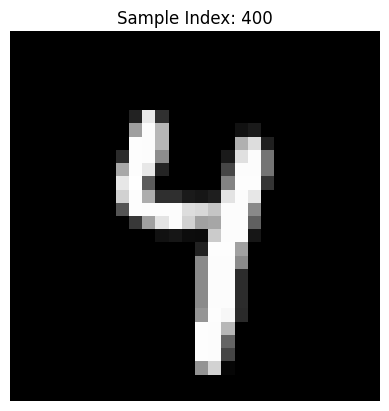

In [13]:
import matplotlib.pyplot as plt

# Ambil satu sampel
sample_idx = 400
sample_image = X_test[sample_idx].reshape(28, 28)  # Ubah ke bentuk asli 28x28

# Plot gambar
plt.imshow(sample_image, cmap="gray")
plt.title(f"Sample Index: {sample_idx}")
plt.axis("off")  # Hilangkan sumbu
plt.show()


In [15]:
sample_image = X_test[sample_idx].reshape(1, -1) 
ypred = n.predict(sample_image)
proba = []
for y in ypred:
    for y_i in y:
        proba.append(y_i.data)


In [16]:
ypred

[[Value(data=0.7412271054845556, grad=0),
  Value(data=0.6973990564782304, grad=0),
  Value(data=0.7497800792673442, grad=0),
  Value(data=0.7243061798162219, grad=0),
  Value(data=0.7403522505893, grad=0),
  Value(data=0.748907199117012, grad=0),
  Value(data=0.7687154816653705, grad=0),
  Value(data=0.7001067450374765, grad=0),
  Value(data=0.7571633211279303, grad=0),
  Value(data=0.7567846590058075, grad=0)]]

In [ ]:
# Plot Probabilitas Output
plt.bar(range(10),proba )
plt.xlabel("Digit (0-9)")
plt.ylabel("Probabilitas")
plt.title("Probabilitas Prediksi Model MLP Sklearn")
plt.show()

In [ ]:
layer1_weights = np.array([neuron.w for neuron in n.layers[1].neurons])  
print(layer1_weights.shape) 

coef = layer1_weights.copy()  
coef_array = np.array([[v.data for v in row] for row in coef])  
sparsity = np.mean(coef_array == 0) * 100
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
scale = np.abs(coef_array).max()

for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef_array[i].reshape(28, 28),  # Sesuai format 28x28
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel(f"Class {i}")

plt.suptitle("Classification vector for first hidden layer weights")
plt.show()


In [ ]:
n.plot_W_distribution(layers=0)

#### Sample Testing

In [ ]:



input_layer = 784
output_layer = 10
batch_size = 100
np.random.seed(42)
x = np.random.uniform(-2,2,(batch_size,input_layer))
y= np.random.uniform(-1,1,(batch_size,output_layer))



X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=42)

print("Training X shape:", X_train.shape)
print("Validation Y shape:", y_val.shape)


In [ ]:
layer_f_activations = [
  [16,'relu'],
  [8,'relu'],

  [output_layer,'softmax']
]
weight = Weight("uniform", 42, input_layer, lower=-1, upper=1)

#kalau mau ada history valid  loss, masukin y_val dan x_val
n = MLP(input_layer,[n[0] for n in layer_f_activations],activations=[n[1] for n in layer_f_activations],weight=weight)
n.fit(x=X_train,y = y_train ,epoch=1,lossfunc="MSE",learning_rate=0.01)



In [ ]:
n.plot_loss()

In [ ]:
n.plot_W_distribution()

In [ ]:
n.show_grad_distribution()

In [ ]:
for i in range(0,len(n.layers)):
  n.plot_W_distribution(i)

In [ ]:
for i in range(0,len(n.layers)):
  n.plot_grad_distribution(i)

In [ ]:
draw_mlp(n)

In [ ]:
draw_dot(mse).render("graph_output.dot",view = True)

In [ ]:
print(mse._prev)

In [ ]:
draw_mlp(n).render("mlp.dot",view= True)
